### Problem Statement : What are the factors and features that are influencing the price of an AirBnb listing?
The above problem statement can be broken down into 3 sub-problems each one targeting a different aspect of the dataset.
The three sub-problems are:
1) What are the features of a listing that influence its price?

2) What are the most popular neighbourhoods among Airbnb guests in the area?

3) Does review's sentiment affect the price?

By analysing the dataset with respect to each sub-problem, we can gain useful statistical insights about the data. 

In [46]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
sb.set() # set the default Seaborn style for graphics
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter

### Sub-problem 1 : What are the features of a listing that influence its price?

In [2]:
# Importing the listing dataset
listings_df = pd.read_csv('listings.csv')
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,90,3,212,2023-03-04,2.13,1,347,20,R17000015609
1,94450,Comfy Garden Suite in Andersonville,504470,Mark,NaN,Edgewater,41.97960,-87.66512,Entire home/apt,65,7,7,2022-12-01,0.88,1,178,7,R22000082956
2,145659,Trendy Roscoe Village 3BR/2BR walk to shops,683529,Joe,NaN,North Center,41.94342,-87.68121,Entire home/apt,198,2,59,2022-12-31,0.65,22,330,15,2209272
3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,85,2,483,2023-02-26,2.89,1,279,48,R21000075737
4,189821,"Best in Chicago, private, amazing garden space",899757,Meighan,NaN,Logan Square,41.92918,-87.70219,Entire home/apt,202,3,598,2023-02-25,4.27,1,207,24,R21000062936


In [3]:
listings_df.drop('neighbourhood_group', axis = 1, inplace = True)
# Replace NaN values with 0
listings_df.fillna(0, inplace=True)
# Remove listings with 0
listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.reviews_per_month > 0]

listings_df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to UChicago,2613,Rebecca,Hyde Park,41.78790,-87.58780,Private room,90,3,212,2023-03-04,2.13,1,347,20,R17000015609
1,94450,Comfy Garden Suite in Andersonville,504470,Mark,Edgewater,41.97960,-87.66512,Entire home/apt,65,7,7,2022-12-01,0.88,1,178,7,R22000082956
2,145659,Trendy Roscoe Village 3BR/2BR walk to shops,683529,Joe,North Center,41.94342,-87.68121,Entire home/apt,198,2,59,2022-12-31,0.65,22,330,15,2209272
3,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.90166,-87.68021,Entire home/apt,85,2,483,2023-02-26,2.89,1,279,48,R21000075737
4,189821,"Best in Chicago, private, amazing garden space",899757,Meighan,Logan Square,41.92918,-87.70219,Entire home/apt,202,3,598,2023-02-25,4.27,1,207,24,R21000062936


### Analyzing the listings based on room types.

Number of room types : 4
Entire home/apt    4793
Private room       1348
Shared room          63
Hotel room           48
Name: room_type, dtype: int64


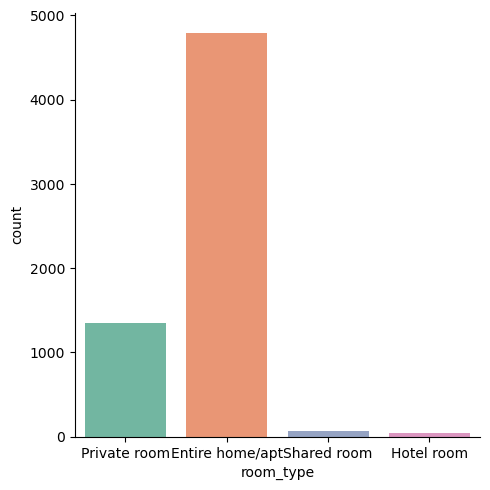

In [4]:
# Number of room types
print("Number of room types :", len(listings_df["room_type"].unique()))

# Number of listings of each room type
print(listings_df["room_type"].value_counts())
sb.catplot(x = "room_type", data = listings_df, kind = "count", palette="Set2")

As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second, shared rooms being the third and hotel rooms being the last.

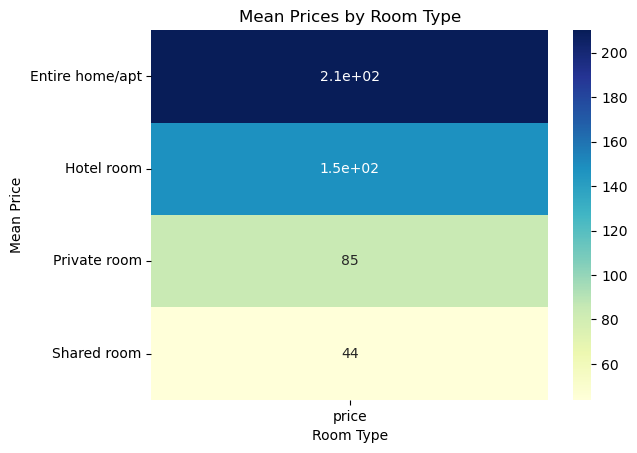

In [5]:
# Create a pivot table to calculate the mean price for each room_type
pivot_df = pd.pivot_table(listings_df, values='price', index='room_type', aggfunc='mean')

# Create a heatmap using seaborn
sb.heatmap(pivot_df, annot=True, cmap='YlGnBu')

# Add labels and title
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Room Type')

# Show the plot
plt.show()

From the above heatmap, with lighter colour representing lower price and darker representing higher price, we can see that shared rooms have the lighest colour hence cheapest. Private rooms have a slightly darker colour so they are in the middle followed by hotels and then entire houses are the darkest thus the most expensive.

All of this tells us that the room_type plays a very important role in the final price of the listing.

### Sub-problem 2 :  What are the most popular neighbourhoods among Airbnb guests in the area?

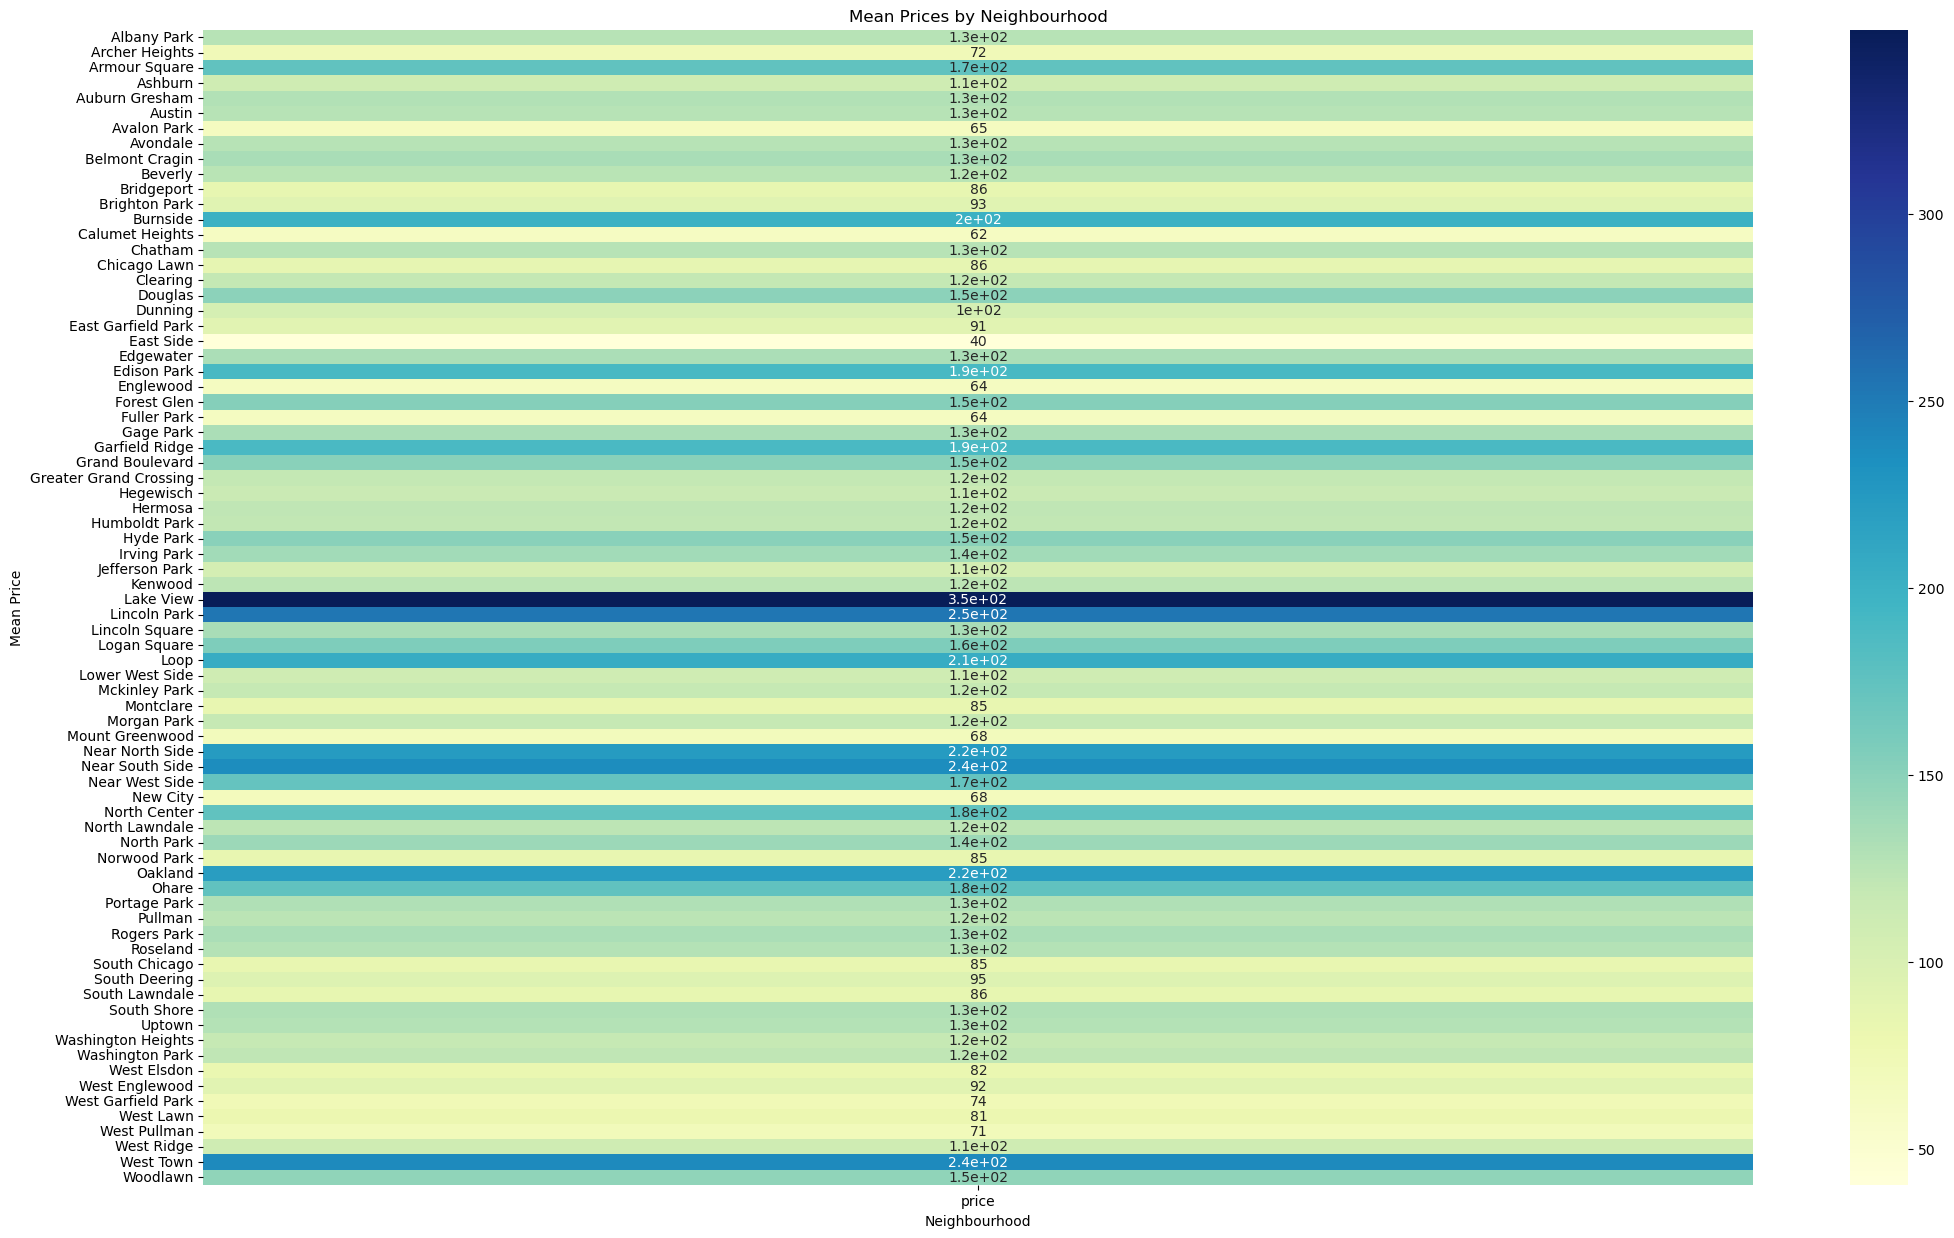

In [6]:
# Create a pivot table to calculate the mean price for each neighbourhood
pivot_df = pd.pivot_table(listings_df, values='price', index='neighbourhood', aggfunc='mean')

# Create a heatmap using seaborn
fig, ax = plt.subplots(figsize=(25,15))
sb.heatmap(pivot_df, annot=True, cmap='YlGnBu',ax=ax)

# Add labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.title('Mean Prices by Neighbourhood')

# Show the plot
plt.show()

#### Finding the number of listings for each neighbourhood and median price

In [7]:
# Grouping neighbourhood by number of listings and then cleaning them

neighbourhood_df=listings_df.groupby('neighbourhood').id.count()
neighbourhood_df=neighbourhood_df.reset_index()
neighbourhood_df=neighbourhood_df.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_df=neighbourhood_df.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_df.head()

,neighbourhood,Number_Of_Listings
74,West Town,690
47,Near North Side,560
37,Lake View,537
40,Logan Square,392
49,Near West Side,308


In [8]:
# Grouping neighbourhood by average price of listings and cleaning them

neighbourhood_price_df=listings_df.groupby('neighbourhood').price.median()
neighbourhood_price_df=neighbourhood_price_df.reset_index()
neighbourhood_price_df=neighbourhood_price_df.rename(columns={'price':'Median_Price'})
neighbourhood_price_df=neighbourhood_price_df.sort_values('Median_Price',ascending=[0])
neighbourhood_price_df.head()

,neighbourhood,Median_Price
48,Near South Side,247.0
12,Burnside,200.0
22,Edison Park,191.0
41,Loop,178.0
38,Lincoln Park,176.0


In [9]:
# Merging the two dataframes

merge_df=pd.merge(neighbourhood_df,neighbourhood_price_df,on='neighbourhood')
merge_df.head()

,neighbourhood,Number_Of_Listings,Median_Price
0,West Town,690,132.0
1,Near North Side,560,160.0
2,Lake View,537,115.0
3,Logan Square,392,114.0
4,Near West Side,308,135.5


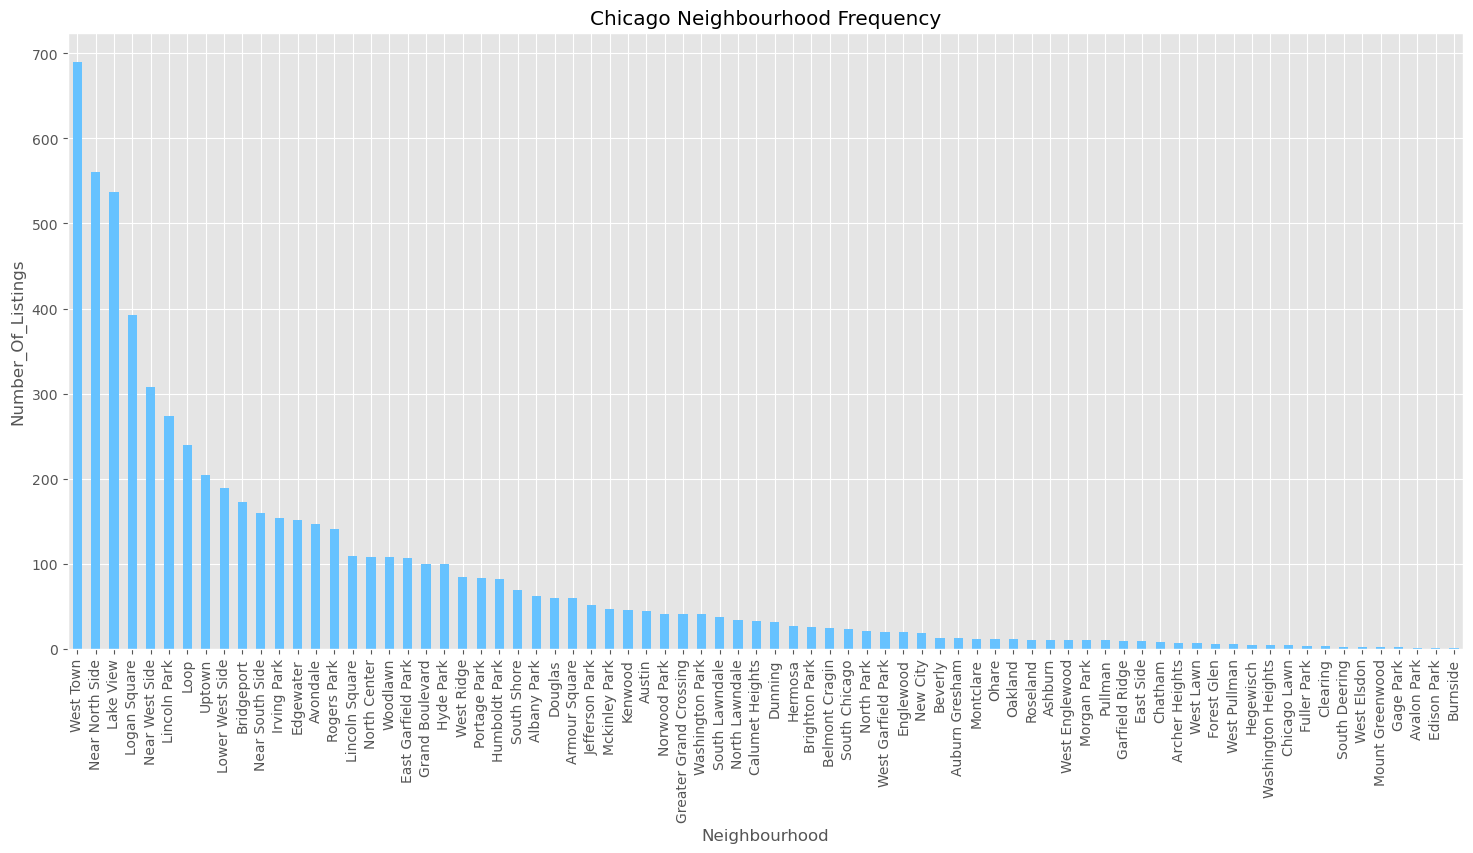

In [14]:
# Visualizing the number of listings for each neighbourhood
matplotlib.style.use('ggplot')

objects = neighbourhood_df['neighbourhood']
y_pos = neighbourhood_df['Number_Of_Listings']

neighbourhood_df.plot(kind='bar', 
           x='neighbourhood',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(18,8), 
           title = 'Chicago Neighbourhood Frequency', 
           legend = False)

plt.ylabel('Number_Of_Listings')
plt.xlabel('Neighbourhood')
plt.show()

We can see that most of the listings appear in 'West Town','Near North Side','Lake View','Logan Square' etc. This gives us a good insight into the potential neighbourhoods where there are high number of listings. Our next step would be to analyze it with the price.

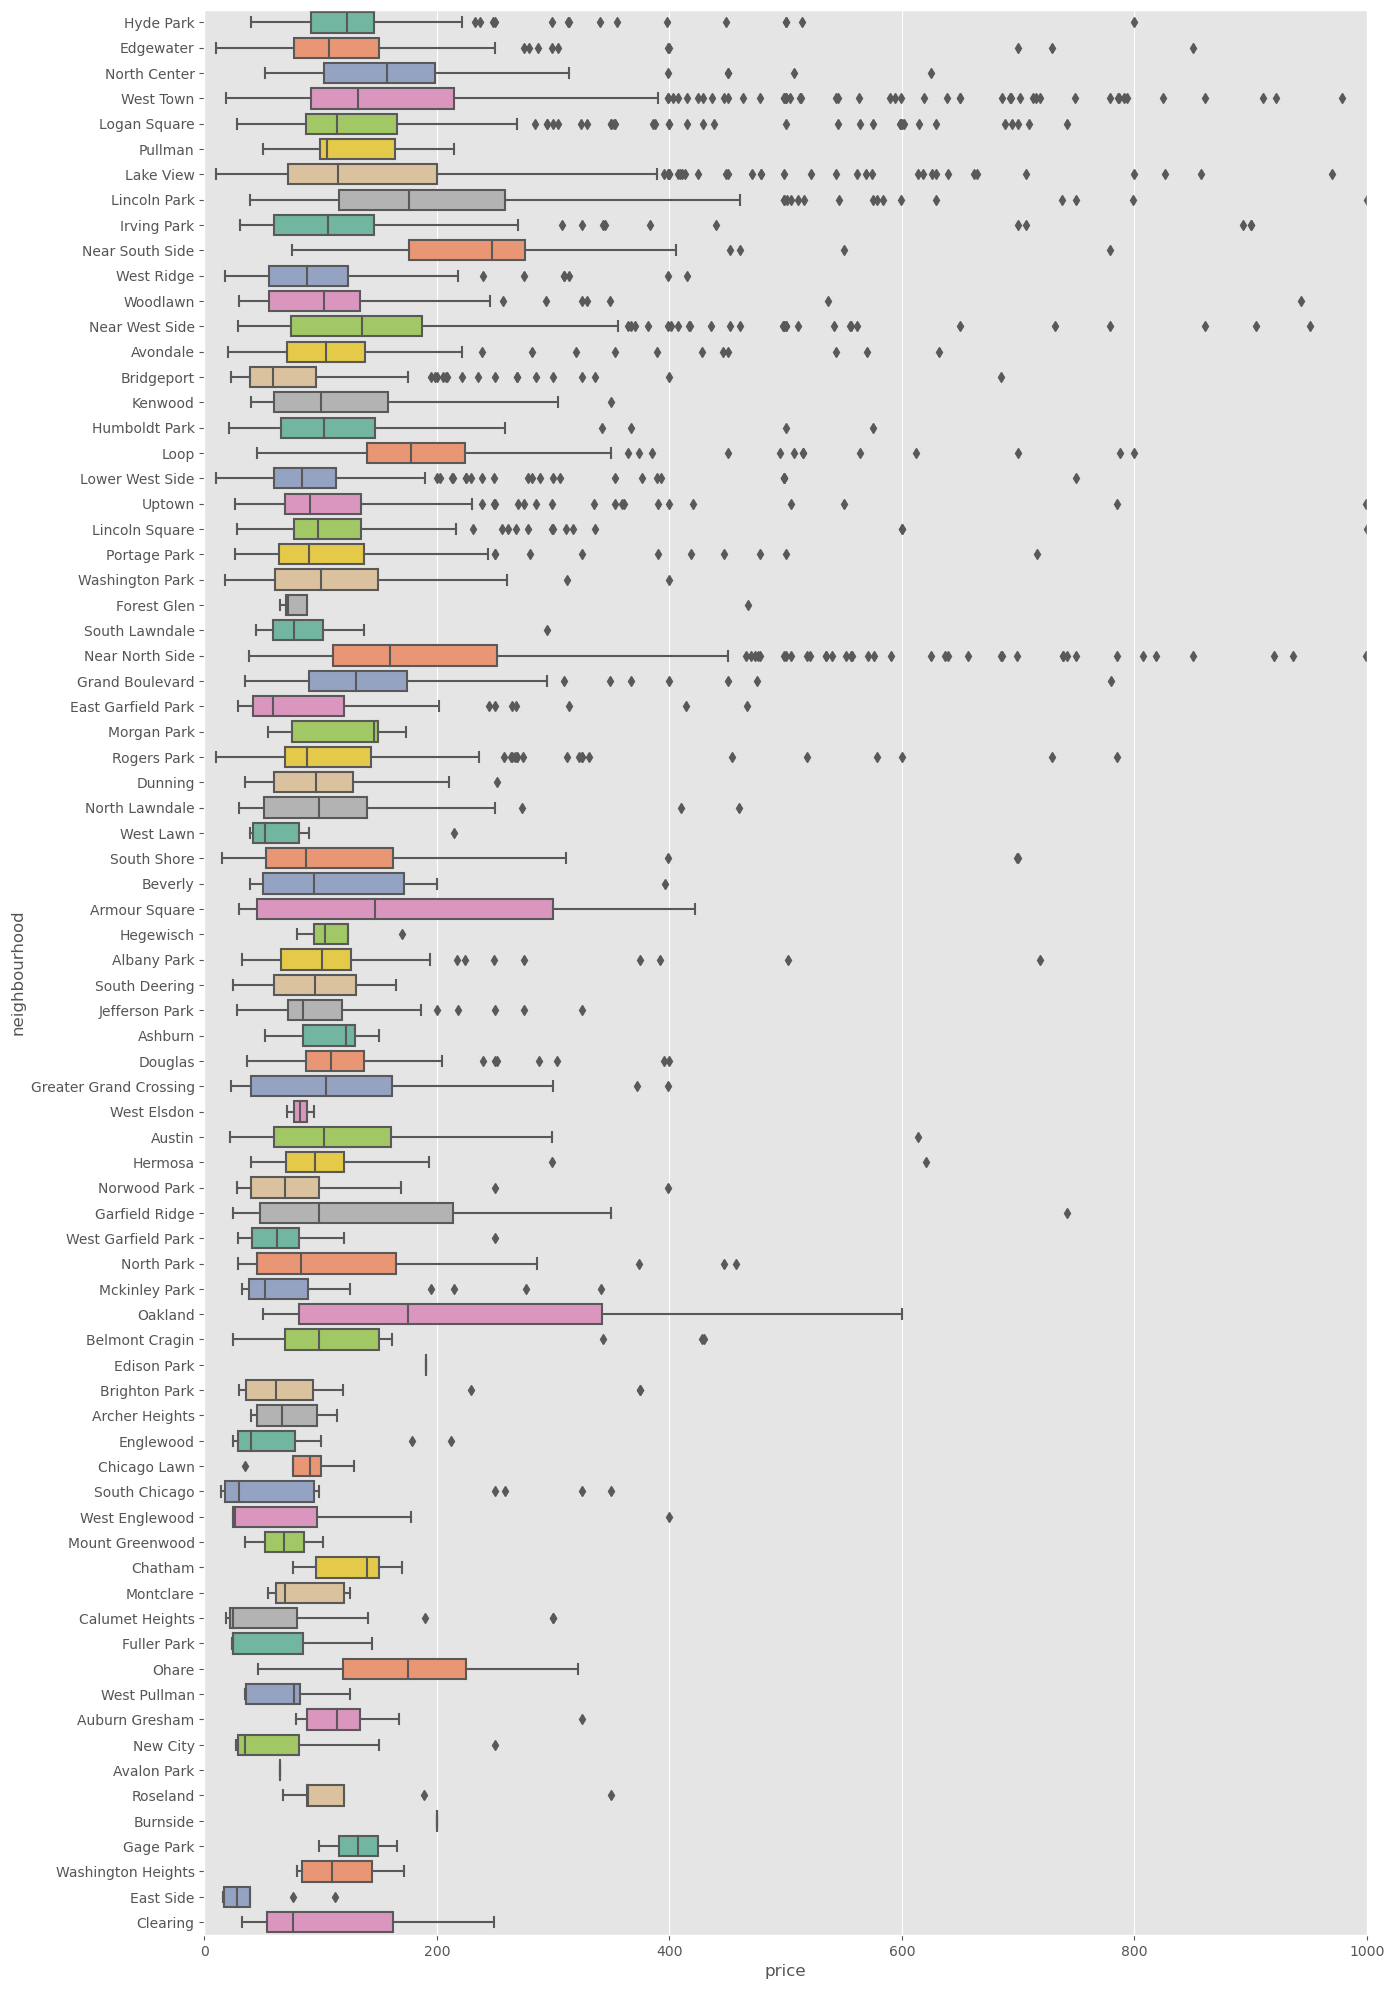

In [18]:
plt.figure(figsize = (15,25))
sb.boxplot(y = "neighbourhood", x = "price", data = listings_df, palette="Set2")
plt.xlim(0,1000)
plt.show()

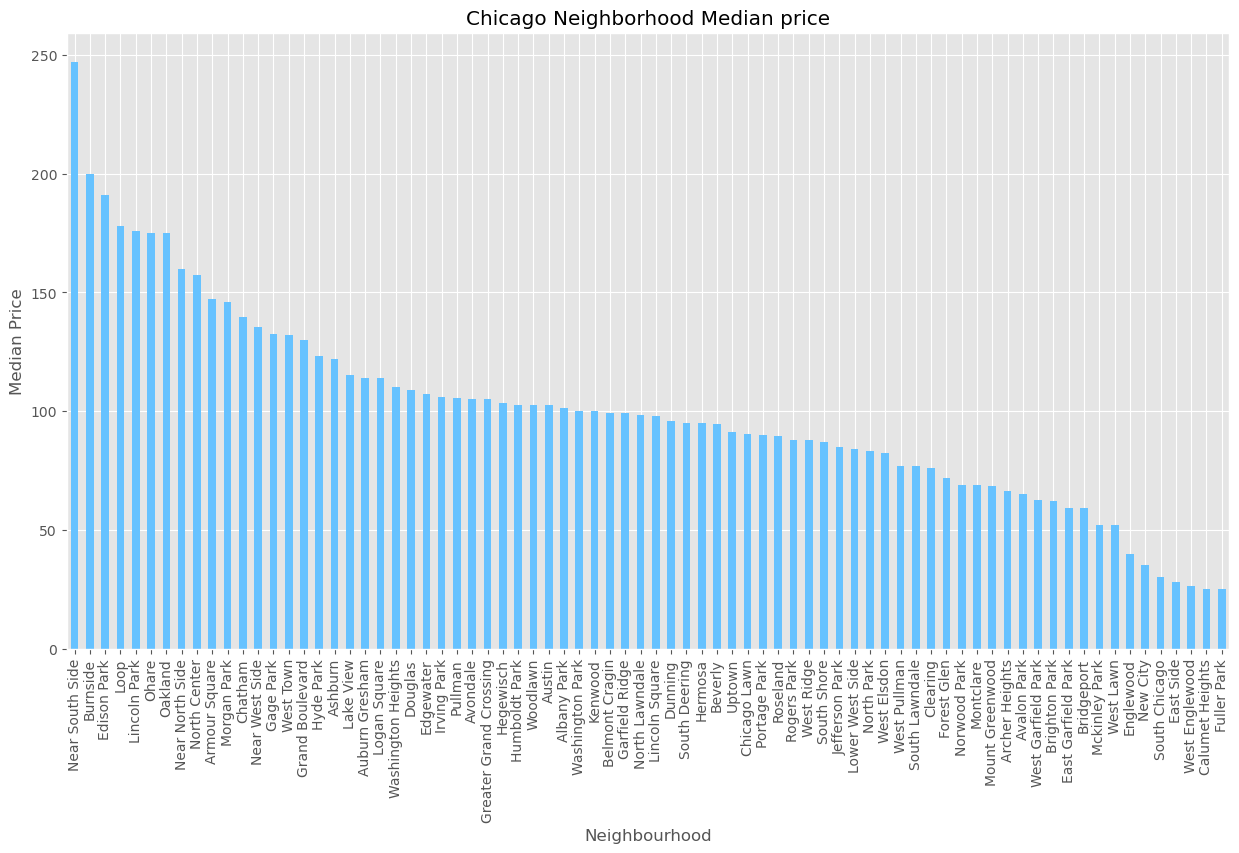

In [17]:
matplotlib.style.use('ggplot')

objects = neighbourhood_price_df['neighbourhood']
y_pos = neighbourhood_price_df['Median_Price']

neighbourhood_price_df.plot(kind='bar', 
           x='neighbourhood',
           y='Median_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Chicago Neighborhood Median price', 
           legend = False)

plt.ylabel('Median Price')
plt.xlabel('Neighbourhood')
plt.show()

By analyzing the number of listings and prices for each neighborhood, we can get a clearer understanding of which neighbourhoods have a lot of expensive listings. Looking at the analysis done so far, we can see that certain neighbourhoods are indeed more 'expensive' than others. However, some of those neighbourhoods do not have as many listings as other expensive neighbourhoods.

### Sub-problem 3 : Does review's sentiment affect the price?

In [19]:
reviews_df = pd.read_csv("reviews.csv")
reviews_df = reviews_df.dropna()
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...
2,2384,30273263,2015-04-19,26101401,Patrick,The reservation was canceled 80 days before ar...
3,2384,30974202,2015-04-30,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...
4,2384,31363208,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r<br...


In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon') # download the vader lexicon

sid = SentimentIntensityAnalyzer()

reviews_df['polarity_value'] = reviews_df['comments'].apply(lambda x: sid.polarity_scores(x)['compound'])
reviews_df['neg'] = reviews_df['comments'].apply(lambda x: sid.polarity_scores(x)['neg'])
reviews_df['pos'] = reviews_df['comments'].apply(lambda x: sid.polarity_scores(x)['pos'])
reviews_df['neu'] = reviews_df['comments'].apply(lambda x: sid.polarity_scores(x)['neu'])
reviews_df['compound'] = reviews_df['comments'].apply(lambda x: sid.polarity_scores(x)['compound'])

reviews_df.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...,0.9489,0.000,0.310,0.690,0.9489
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...,0.9519,0.037,0.187,0.776,0.9519
2,2384,30273263,2015-04-19,26101401,Patrick,The reservation was canceled 80 days before ar...,0.0000,0.000,0.000,1.000,0.0000
3,2384,30974202,2015-04-30,26247321,Cristina,Sólo puedo decir cosas buenas de Rebecca. La h...,0.0000,0.000,0.000,1.000,0.0000
4,2384,31363208,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r<br...,0.9669,0.038,0.116,0.847,0.9669


In [21]:
from langdetect import detect

def detect_lang(sentence):
    sentence = str(sentence)
    try:
        return detect(sentence)
    except:
        return "None"

reviews_df['language'] = reviews_df['comments'].apply(lambda x: detect_lang(x))
eng_reviews_df= reviews_df[reviews_df['language'] == 'en']

eng_reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,polarity_value,neg,pos,neu,compound,language
0,2384,25218143,2015-01-09,14385014,Ivan,it's a wonderful trip experience. I didn't exc...,0.9489,0.000,0.310,0.690,0.9489,en
1,2384,28475392,2015-03-24,16241178,Namhaitou,This is my first trip using Airbnb. I was a li...,0.9519,0.037,0.187,0.776,0.9519,en
2,2384,30273263,2015-04-19,26101401,Patrick,The reservation was canceled 80 days before ar...,0.0000,0.000,0.000,1.000,0.0000,en
4,2384,31363208,2015-05-04,31293837,SuJung,Rebecca was an absolutely wonderful host.\r<br...,0.9669,0.038,0.116,0.847,0.9669,en
5,2384,31820011,2015-05-10,2873370,Krishanu,Rebecca really tried to make it feel like home...,0.9809,0.020,0.141,0.839,0.9809,en


In [67]:
reviews_df.to_csv('polarity_reviews.csv')

#### Number of comments with positive sentiment

In [24]:
polar_df = eng_reviews_df[['pos']]
polar_df = polar_df.groupby(pd.cut(polar_df['pos'], np.arange(0, 1.1, 0.1))).count()
polar_df = polar_df.rename(columns={'pos':'count_of_comments'})
polar_df = polar_df.reset_index()
polar_df['range'] = polar_df['pos'].apply(lambda x: float(str(x)[1:4].replace(',', '')))
polar_df['sentiment'] = 'positive'
del polar_df['pos']
polar_df.head()

,count_of_comments,range,sentiment
0,7732,0.0,positive
1,40602,0.1,positive
2,78955,0.2,positive
3,77914,0.3,positive
4,52446,0.4,positive


#### Number of comments with negative sentiment

In [27]:
polar_df_neg = eng_reviews_df[['neg']]
polar_df_neg = polar_df_neg.groupby(pd.cut(polar_df_neg['neg'], np.arange(0, 1.1, 0.1))).count()
polar_df_neg = polar_df_neg.rename(columns={'neg':'count_of_comments'})
polar_df_neg = polar_df_neg.reset_index()
polar_df_neg['range'] = polar_df_neg['neg'].apply(lambda x: float(str(x)[1:4].replace(',', '')))
polar_df_neg['sentiment'] = 'negative'
del polar_df_neg['neg']

polar_df = pd.concat([polar_df,polar_df_neg[['count_of_comments', 'range', 'sentiment']]], ignore_index=True)
polar_df_neg.head()

,count_of_comments,range,sentiment
0,62575,0.0,negative
1,8062,0.1,negative
2,1268,0.2,negative
3,317,0.3,negative
4,166,0.4,negative


#### Number of comments with neutral sentiment

In [28]:
polar_df_neut = eng_reviews_df[['neu']]
polar_df_neut = polar_df_neut.groupby(pd.cut(polar_df_neut['neu'], np.arange(0, 1.0, 0.1))).count()
polar_df_neut = polar_df_neut.rename(columns={'neu':'count_of_comments'})
polar_df_neut = polar_df_neut.reset_index()
polar_df_neut['range'] = polar_df_neut['neu'].apply(lambda x: float(str(x)[1:4].replace(',', '')))
polar_df_neut['sentiment'] = 'neutral'
del polar_df_neut['neu']

polar_df = pd.concat([polar_df, polar_df_neut[['count_of_comments', 'range', 'sentiment']]], ignore_index=True)
polar_df_neut.head()

,count_of_comments,range,sentiment
0,193,0.0,neutral
1,7033,0.1,neutral
2,10885,0.2,neutral
3,18175,0.3,neutral
4,34436,0.4,neutral


<Figure size 1000x1000 with 0 Axes>

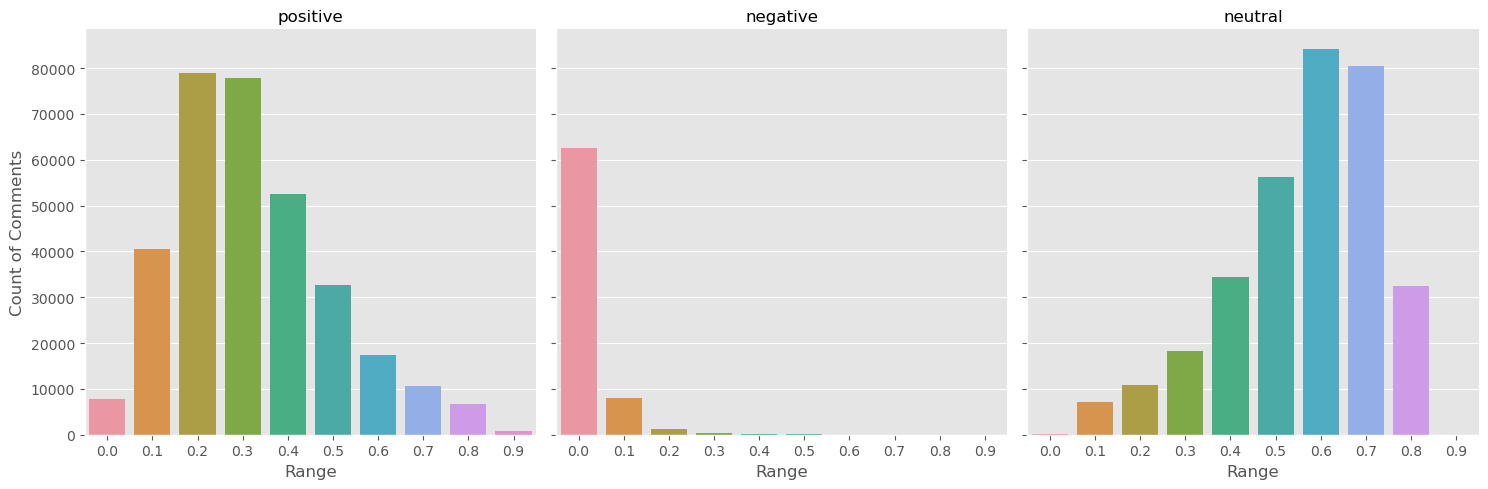

In [29]:
plt.figure(figsize=(10,10))
g = sb.catplot(data=polar_df, x="range", y="count_of_comments",col="sentiment", kind="bar")
g.set_axis_labels("Range", "Count of Comments")
g.set_titles("{col_name}")
plt.show()

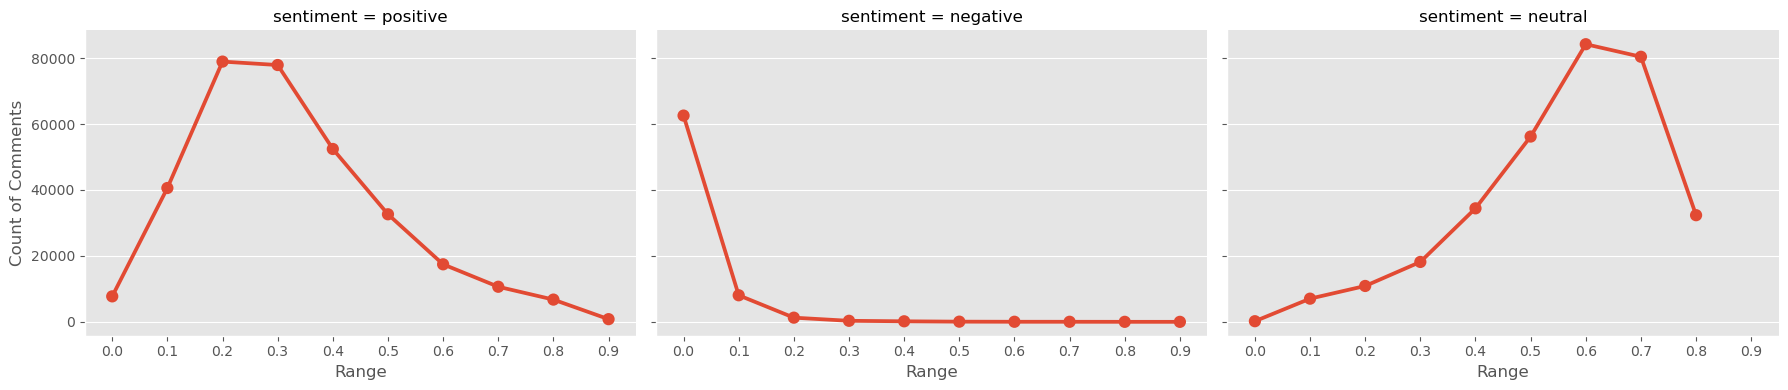

<Figure size 1000x1000 with 0 Axes>

In [43]:
# Create a catplot
g = sb.catplot(data=polar_df, x="range", y="count_of_comments", col="sentiment", kind="point", height=4, aspect=1.5)

# Set the x-axis label
g.set_axis_labels("Range", "Count of Comments")

plt.figure(figsize=(10, 10))

# Show the plot
plt.show()

From the graphs above, we can conclude 3 things. First is that most reviews do not have much negativity. Only a few reviews have a modicum of negativity. Infact, most of the reviews have no negativity classified in the 0.0 negative sentiment. Second thing we can see is that there are a lot of reviews with a reasonable amount of positivity. However, the final thing we can conclude is that most of the reviews have much neutrality. If most of the reviews have a lot of neutrality, we cannot infer much on positivity/negativity of comments with respect to price since the bulk of reviews all fall in the neutral category. So we can conclude that most reviews are written with a neutral sentiment although there is a very slight tilt to positive sentiments.

In [61]:
polarity_reviews_df = pd.read_csv("polarity_reviews.csv")
listings_df = listings_df.rename(columns={'id': 'listing_id'})
listings_df = pd.merge(listings_df, polarity_reviews_df, on='listing_id', how='left')

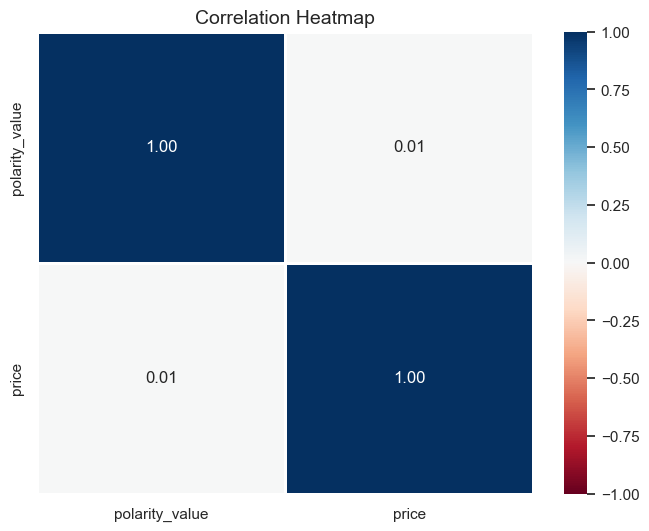

In [65]:
price_review2 = listings_df[['polarity_value', 'price']].sort_values(by='price')
corr = price_review2.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(corr, vmin=-1, vmax=1, linewidths=1, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap="RdBu")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

From the above heatmap we can infer that polarity_value and price have a positive correlation between them.

### Analyzing if number of reviews of a listing affects its price.

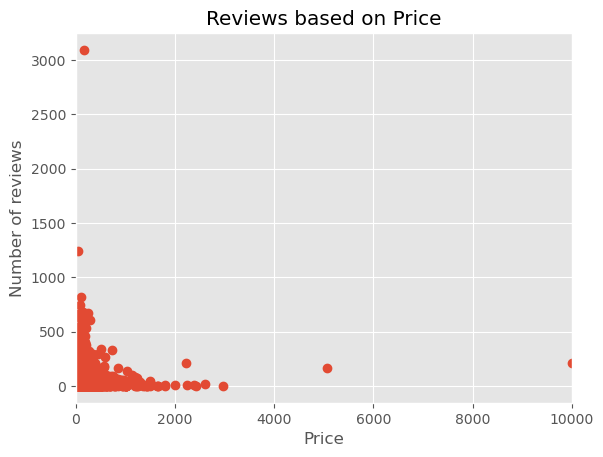

In [44]:
# Sort the data by price
#price_review = inputDF[['number_of_reviews', 'price']].sort_values(by='price')
price_review = listings_df[['number_of_reviews', 'price']].sort_values(by='price')
# Plot the data
plt.figure()
plt.plot(price_review['price'], price_review['number_of_reviews'], 'o')
plt.title('Reviews based on Price')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.xlim(0,10000)
plt.show()

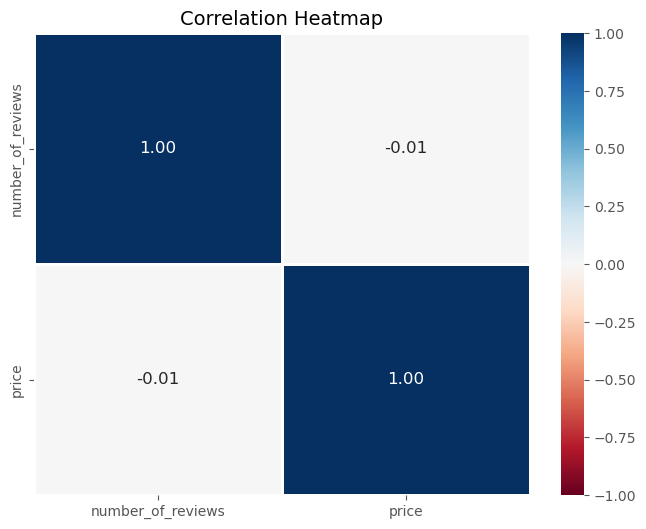

In [45]:
corr = price_review.corr()
plt.figure(figsize=(8, 6))
sb.heatmap(corr, vmin=-1, vmax=1, linewidths=1, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap="RdBu")
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

From the above correlation matrix, we can clearly see that number of reviews and the price of a listing has a weak negative correlation. Hence we can conclude that the number of reviews a listing receives does not have much of an impact on the price.